# 전처리

In [ ]:
!pip install seaborn
!pip install mixtend

In [1]:
#패키지 불러오기

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.colors as mcl
 
from matplotlib.colors import LinearSegmentedColormap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = 'NanumGothic' # 폰트 설정
sns.set(font='NanumGothic')

## 치료결과 데이터

### 사용할 변수

- VTHOS_NO 내원 번호(key)
- RSLT_CONT 결과내용
- WITHN30_REHOSP_YN 30일이내 재입원 여부

In [3]:
cure = pd.read_csv('./의료원본데이터/7_치료결과.csv')

In [4]:
cure_1 = cure.drop(['RGNO','ESB_TX_ID','ESB_STATE_CD','ESB_TIME'], axis='columns')

In [5]:
cure_1['RSLT_CONT'].unique()

array(['경쾌', '48시간이후 사망', '완쾌', '진단뿐', '호전안됨', '48시간이내 사망', '가망없는 퇴원'],
      dtype=object)

In [6]:
duplicated_rows = cure_1.duplicated(subset=['VTHOS_NO'], keep=False) #내원 번호 중복값 확인
print(cure_1[duplicated_rows])

                                                VTHOS_NO RSLT_CONT  \
34300  0xdac57ecb9abb5fb14089f575708e85955f92d277062a...        경쾌   
34301  0xdac57ecb9abb5fb14089f575708e85955f92d277062a...        경쾌   
50028  0x94ed845cc6864bee0c9b8ea564ee29207b8937b9ed64...        완쾌   
50029  0x94ed845cc6864bee0c9b8ea564ee29207b8937b9ed64...        완쾌   

      WTHN30_REHOSP_YN  
34300                N  
34301                N  
50028                Y  
50029                Y  


In [7]:
# 똑같은 환자 코드에 사용할 변수도 동일 2개의 행만 중복되므로 삭제

cure_2 = cure_1.drop_duplicates(subset=['VTHOS_NO'])

## 데이터 수정
- 경쾌, 완쾌는 증상이 호전됨
- 호전안됨, 48시간 이내 이후 사망, 가망없는 퇴원은 위험
- 진단뿐은 환자 결과 예측 불가로 삭제

In [8]:
cure_2.loc[cure_2['RSLT_CONT'].isin(['경쾌', '완쾌']), 'RSLT_CONT'] = '호전됨'
cure_2.loc[cure_2['RSLT_CONT'].isin(['48시간이후 사망', '48시간이내 사망', '호전안됨', '가망없는 퇴원']), 'RSLT_CONT'] = '위험'

C:\Users\kinsh\AppData\Local\Temp\ipykernel_19960\3116578675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cure_2.loc[cure_2['RSLT_CONT'].isin(['경쾌', '완쾌']), 'RSLT_CONT'] = '호전됨'
C:\Users\kinsh\AppData\Local\Temp\ipykernel_19960\3116578675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cure_2.loc[cure_2['RSLT_CONT'].isin(['48시간이후 사망', '48시간이내 사망', '호전안됨', '가망없는 퇴원']), 'RSLT_CONT'] = '위험'


In [9]:
cure_2 = cure_2.drop(cure_2[cure_2['RSLT_CONT'] == '진단뿐'].index)

In [10]:
cure_2

,VTHOS_NO,RSLT_CONT,WTHN30_REHOSP_YN
0,0x74559bbe273d71a574ed4d81867767c6e53b16b8b776...,호전됨,Y
1,0x6a083ab7db36e19b5770f8380560cf969be57b922cc4...,호전됨,N
2,0x202db480d6451c1cec7ef3e2631af982aa93ec1fdb55...,호전됨,N
3,0xcd96b86f02ebda4b6998105804165b8a0fcba1e1a5ea...,호전됨,Y
4,0xf805fa6ad9d4fb1e1fe8f671814cd63ed7e249d5cdd7...,호전됨,N
...,...,...,...
111332,0xa12cd19ecd28040196252a450706cd303edf2fe0cfeb...,호전됨,N
111333,0xb5d1f67c529210609d45e24b1bd723eba382bf18af63...,호전됨,N
111334,0xd64416d3e055f3597b1e7fca8274c68776d80b9e5506...,호전됨,N
111335,0x7c2faf42b565aa976e9c198a85ecb10ed7d4ed8c5263...,호전됨,N


## 내원정보 데이터

### 사용할 변수

- VTHOS_NO 내원 번호(key)
- ARRDE 연령대
- SEX_CD 성별

In [11]:
information = pd.read_csv('./의료원본데이터/1_내원정보.csv')

In [12]:
information_1 = information.drop(['RGNO','AREA_ADRES','VTHOS_CLSF_CD','IADM_DEPTT_NM','DEPTT_NM','ADM_YMD','LTHT_YMD','ESB_TX_ID','ESB_STATE_CD','ESB_TIME'], axis='columns')

In [13]:
information_1

,VTHOS_NO,AGRDE,SEX_CD
0,0xc4ce7d5f0319782bc6ba2a198257d3fb1d45683a5631...,50대,M
1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,70대,F
2,0xa6a2a384d57ff6513821f71fcd4115721349983fe89b...,50대,M
3,0x0c83e93507b7d9e420aad909a38cf858bbe2305a48e5...,50대,M
4,0xbf6dd9b26eeedef81ec64430f12930e8f80a94db5cbd...,20대,M
...,...,...,...
249614,0x02603261cedef1f5b9e7921cf2589a37e19bf0618ad1...,20대,M
249615,0x59030044f210a45480c314dd8c320ff524710c6c01e9...,20대,F
249616,0xaad77dca956f38317f7a38f52473357f1ad5342c8438...,40대,M
249617,0x4689a79f4652d26bf4456f6e802c2b03fb710a7c18af...,60대,M


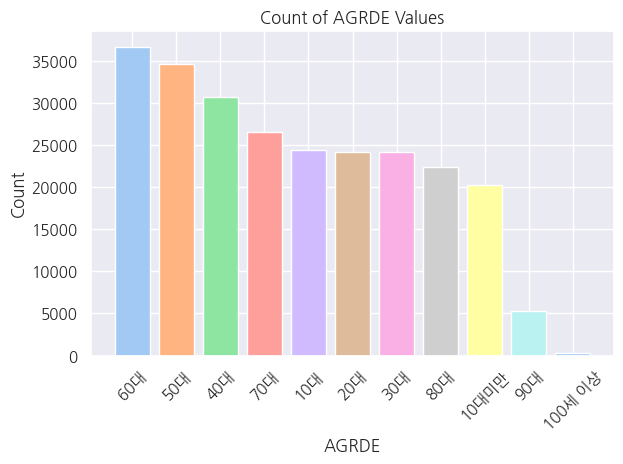

In [14]:
agrde_counts = information_1['AGRDE'].value_counts()

# 파스텔 색상 팔레트 생성
pastel_palette = sns.color_palette("pastel")

# bar plot 그리기
plt.bar(agrde_counts.index, agrde_counts.values, color=pastel_palette)
plt.xlabel('AGRDE')
plt.ylabel('Count')
plt.title('Count of AGRDE Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# 내원정보를 치료결과 예측을 위해 병합

merge = pd.merge(information_1 ,cure_2, how = 'inner', on='VTHOS_NO')

In [16]:
merge

,VTHOS_NO,AGRDE,SEX_CD,RSLT_CONT,WTHN30_REHOSP_YN
0,0xc4ce7d5f0319782bc6ba2a198257d3fb1d45683a5631...,50대,M,호전됨,N
1,0xf6a8ce3aeed28eb76d4d3eff900c7af1bf911b52575e...,70대,F,호전됨,N
2,0x0c83e93507b7d9e420aad909a38cf858bbe2305a48e5...,50대,M,호전됨,N
3,0xbf6dd9b26eeedef81ec64430f12930e8f80a94db5cbd...,20대,M,호전됨,N
4,0x3fcf6f353efd0c6f2c74f3efadc61cc8ffcb1312d14a...,40대,F,호전됨,N
...,...,...,...,...,...
109858,0x8f473443c28814041e8bd34d49f5fad6d85693f2df5b...,30대,M,호전됨,N
109859,0x53444cce695968a73f86ed0d5eae15705248b5bd60da...,50대,M,호전됨,N
109860,0xaad77dca956f38317f7a38f52473357f1ad5342c8438...,40대,M,호전됨,N
109861,0x4689a79f4652d26bf4456f6e802c2b03fb710a7c18af...,60대,M,호전됨,N


## 바탕질환 데이터

### 사용할 변수

- VTHOS_NO 내원 번호(key)
- ICD10CD ICD10 코드 (질병 분류)
- DIAG_NM 진단명
- MAIN_DIAG_YN 주진단 여부

In [17]:
BG_DS = pd.read_csv('./의료원본데이터/2_바탕질환.csv')

In [18]:
BG_DS

,VTHOS_NO,RGNO,ICD10CD,DIAG_NM,MAIN_DIAG_YN,ESB_TX_ID,ESB_STATE_CD,ESB_TIME
0,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,J21.9,Bronchiolitis,Y,NaN,NaN,NaN
1,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,A49.3,Mycoplasma infection,N,NaN,NaN,NaN
2,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,0xfb909db1b5b566ad3c87f28fab8eafd2bd9abbbb8ca7...,J18.9,Pneumonia,N,NaN,NaN,NaN
3,0x05635cc56defcb7f1772d06accb9569e9daf375025e4...,0xb5c92424b9a2980596af2742da4748adda60360ef32b...,J45.9,Asthma,Y,NaN,NaN,NaN
4,0xeb2054397645832f85b81f005333ee48d557b2460d3d...,0x47d02da7703550966d20712d43450f92bb417a1dc940...,T81.0,S/P tonsillectomy bleeding,Y,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
458256,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,B18.19,"Hepatitis B, viral, chronic",N,NaN,NaN,NaN
458257,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,K81.0,Empyema of gallbladder,N,NaN,NaN,NaN
458258,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,E87.2,Acidosis,N,NaN,NaN,NaN
458259,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,0x2e18a609f4f8bcf79d17ec375a5188685d4e286846bb...,Z11.5,Special screening examination for Coronavirus ...,N,NaN,NaN,NaN


In [19]:
#사용안하는 변수 제거

BG_DS_1 = BG_DS.drop(['RGNO','ESB_TX_ID','ESB_STATE_CD','ESB_TIME'], axis='columns')

In [20]:
BG_DS_1

,VTHOS_NO,ICD10CD,DIAG_NM,MAIN_DIAG_YN
0,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,J21.9,Bronchiolitis,Y
1,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,A49.3,Mycoplasma infection,N
2,0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...,J18.9,Pneumonia,N
3,0x05635cc56defcb7f1772d06accb9569e9daf375025e4...,J45.9,Asthma,Y
4,0xeb2054397645832f85b81f005333ee48d557b2460d3d...,T81.0,S/P tonsillectomy bleeding,Y
...,...,...,...,...
458256,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,B18.19,"Hepatitis B, viral, chronic",N
458257,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,K81.0,Empyema of gallbladder,N
458258,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,E87.2,Acidosis,N
458259,0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...,Z11.5,Special screening examination for Coronavirus ...,N


In [21]:
# 질병 분류와 진단명이 모두 일치하는지 확인 여부

duplicated_rows = BG_DS_1[BG_DS_1.duplicated(subset=['ICD10CD'], keep=False) & (BG_DS_1['ICD10CD'] == 'B18.19')]
duplicated_rows

,VTHOS_NO,ICD10CD,DIAG_NM,MAIN_DIAG_YN
183431,0xc4b64de4da4fe3c712971a1cde607ec8a1a76dabe62d...,B18.19,"Hepatitis B, viral, chronic",N
186015,0xd71546d0f91b3f3822a472fa9a5466d9985700b5292b...,B18.19,Viral hepatitis B,Y
186224,0x0a900e1b9b6169bfb5ebf3ad166424a39ad7c2152970...,B18.19,Viral hepatitis B,N
186310,0xbe4c6f200dd06b4409042671ccf99c5a433281f4e3f4...,B18.19,"Hepatitis B, viral, chronic",N
187088,0x155776f69fde3f383237c224596863eb84375a6f5f52...,B18.19,"Hepatitis B, viral, chronic",N
...,...,...,...,...
455664,0x15b3833aaefdbc9462ee9a71e2587898329648f33188...,B18.19,"Hepatitis B, viral, chronic",N
457760,0x03a523a4748ea4f6e76d1dfe5692c10475b2fb54cb36...,B18.19,"Hepatitis B, viral, chronic",N
457787,0x1884542965bd086124f5b3a75fc106738c99debf4dc6...,B18.19,"Hepatitis B, viral, chronic",N
457798,0x9344e2e97b865fe1cef7f0f764e05fccb0932a3094df...,B18.19,"Hepatitis B, viral, chronic",N


In [22]:
duplicated_rows = BG_DS_1.duplicated(subset=['VTHOS_NO'], keep=False) #내원 번호 중복값 확인
print(BG_DS_1[duplicated_rows])

                                                 VTHOS_NO ICD10CD  \
0       0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...  J21.9    
1       0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...  A49.3    
2       0xa08a0f54814fdb94e623cfe7d0cf992c6b42410388f5...  J18.9    
6       0x3aae05d7b7894828d1f42263c7d937e55c5b87fd749a...  J18.9    
7       0x3aae05d7b7894828d1f42263c7d937e55c5b87fd749a...  J03.90   
...                                                   ...     ...   
458256  0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...  B18.19   
458257  0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...  K81.0    
458258  0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...  E87.2    
458259  0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...  Z11.5    
458260  0x0ac357d0cc0bc1df300267323ce3116ccee10e1dd166...  A41.9    

                                                  DIAG_NM MAIN_DIAG_YN  
0                                           Bronchiolitis            Y  
1                        

In [23]:
# 환자 한명 개개인단 처방 받았던 바탕질환 내용들 병합

BG_grouped = BG_DS_1.groupby('VTHOS_NO').agg({
    'ICD10CD': lambda x: ', '.join(set(x)),
    'DIAG_NM': lambda x: ', '.join(set(x)),
    'MAIN_DIAG_YN': lambda x: ', '.join(set(x))
}).reset_index()

In [24]:
BG_grouped

,VTHOS_NO,ICD10CD,DIAG_NM,MAIN_DIAG_YN
0,0x00002862004292743537d6d4a08dc4a22fdaf62460d4...,"I48.91, I48.1, I50.04","Persistent atrial fibrillation, Heart failure ...","N, Y"
1,0x00009f014fc363f907ba8916c0b627c56dad2f316032...,H25.90,"Cataract, senile (right)",Y
2,0x00010afc50da250c2dc542fa6f2d002615df66fd30ce...,Z38.0,"Newborn, singleton, born in hospital",Y
3,0x0001614c2f104c2453a9b173021936f8526e5f47c565...,"Z11.5 , R10.49, K21.0 , N31.9 , K75.9 , A09.9,...","Acute gastroenteritis, Special screening exami...","N, Y"
4,0x000247dc99829a55ca3678adc6a2d50fde566bdb9c24...,"R50.8, K65.0 , Z11.5 , A09.9, K21.9 , K57.22","Gastro-esophageal reflux disease, Special scre...","N, Y"
...,...,...,...,...
106170,0xfffcc83be835a02fa3c99c6b5b27adc2ca9366d7b0fd...,M50.1,Herniated cervical disc with radiculopathy,Y
106171,0xfffd529ded8b5eab9bfe0853873345ff20b1e3fb161d...,"N73.1 , N83.2 , O00.1 , Z01.4","Pelvic inflammatory disease, chronic, Ovarian ...","N, Y"
106172,0xfffd87e4c59659117712d55006bebae881a7b7f11069...,"N31.9 , K25.90, I87.1 , I80.2 , E78.8 , Z95.8","S/P Inferior vena cava filter, Gastric erosion...","N, Y"
106173,0xfffea9e1616961fac9aab89db474798fc3b4cc3de91a...,M48.06,"Spinal stenosis, lumbar",Y


In [25]:
# 바탕질환을 치료결과 예측을 위해 병합

merge_1 = pd.merge(BG_grouped ,merge, how = 'inner', on='VTHOS_NO')

In [26]:
merge_1

,VTHOS_NO,ICD10CD,DIAG_NM,MAIN_DIAG_YN,AGRDE,SEX_CD,RSLT_CONT,WTHN30_REHOSP_YN
0,0x00002862004292743537d6d4a08dc4a22fdaf62460d4...,"I48.91, I48.1, I50.04","Persistent atrial fibrillation, Heart failure ...","N, Y",60대,M,호전됨,N
1,0x00009f014fc363f907ba8916c0b627c56dad2f316032...,H25.90,"Cataract, senile (right)",Y,60대,F,호전됨,Y
2,0x00010afc50da250c2dc542fa6f2d002615df66fd30ce...,Z38.0,"Newborn, singleton, born in hospital",Y,10대미만,M,호전됨,Y
3,0x0001614c2f104c2453a9b173021936f8526e5f47c565...,"Z11.5 , R10.49, K21.0 , N31.9 , K75.9 , A09.9,...","Acute gastroenteritis, Special screening exami...","N, Y",70대,F,호전됨,N
4,0x000247dc99829a55ca3678adc6a2d50fde566bdb9c24...,"R50.8, K65.0 , Z11.5 , A09.9, K21.9 , K57.22","Gastro-esophageal reflux disease, Special scre...","N, Y",20대,F,호전됨,N
...,...,...,...,...,...,...,...,...
104754,0xfffcc83be835a02fa3c99c6b5b27adc2ca9366d7b0fd...,M50.1,Herniated cervical disc with radiculopathy,Y,30대,M,호전됨,N
104755,0xfffd529ded8b5eab9bfe0853873345ff20b1e3fb161d...,"N73.1 , N83.2 , O00.1 , Z01.4","Pelvic inflammatory disease, chronic, Ovarian ...","N, Y",30대,F,호전됨,Y
104756,0xfffd87e4c59659117712d55006bebae881a7b7f11069...,"N31.9 , K25.90, I87.1 , I80.2 , E78.8 , Z95.8","S/P Inferior vena cava filter, Gastric erosion...","N, Y",80대,F,호전됨,N
104757,0xfffea9e1616961fac9aab89db474798fc3b4cc3de91a...,M48.06,"Spinal stenosis, lumbar",Y,60대,F,호전됨,N


## 생징후 데이터

### 사용할 변수

- VTHOS_NO 내원 번호(key)
- VTHOS_NO 내원 번호
- IEM_NM 항목명
- IEM_CONT 항목 내용

In [27]:
vital = pd.read_csv('./의료원본데이터/3_생징후_자료_2013_2018.csv')

In [28]:
vital_1 = pd.read_csv('./의료원본데이터/3_생징후_자료_2019_202210-002.csv')

C:\Users\kinsh\AppData\Local\Temp\ipykernel_19960\662757862.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  vital_1 = pd.read_csv('./의료원본데이터/3_생징후_자료_2019_202210-002.csv')


In [29]:
vital_2 = pd.concat([vital, vital_1])

In [30]:
vital_2 = vital_2.drop(['RGNO','INP_YMD','ESB_TX_ID','ESB_STATE_CD','ESB_TIME'], axis='columns')

In [31]:
vital_2

,VTHOS_NO,IEM_NM,IEM_CONT
0,0xda93e436da69f65f7924d577300bab9396c7879891f2...,맥박,71
1,0xda93e436da69f65f7924d577300bab9396c7879891f2...,호흡,20
2,0xda93e436da69f65f7924d577300bab9396c7879891f2...,체온,36.2
3,0xda93e436da69f65f7924d577300bab9396c7879891f2...,SBP,117
4,0xda93e436da69f65f7924d577300bab9396c7879891f2...,DBP,74
...,...,...,...
16317467,0x22baf16000ab943b9f9b014fc9e9e0e54c95f1e893fa...,SBP,145.0
16317468,0x22baf16000ab943b9f9b014fc9e9e0e54c95f1e893fa...,DBP,89.0
16317469,0xb42260327945f837e5dee0375ce0342187edc355efa2...,맥박,62.0
16317470,0xb42260327945f837e5dee0375ce0342187edc355efa2...,SBP,154.0


- pivot을 통해 환자 개개인의 생징후를 컬럼 변수로 추출

In [32]:
def remove_duplicates(df, columns):
    df = df.drop_duplicates(subset=columns, keep='first')
    return df

columns_to_check = ['VTHOS_NO', 'IEM_NM']
vital_dup = remove_duplicates(vital_2, columns=columns_to_check)

In [33]:
vital_piv = vital_dup.pivot(index='VTHOS_NO',columns='IEM_NM',values='IEM_CONT')

In [34]:
vital_piv

IEM_NM,DBP,SBP,맥박,체온,호흡
VTHOS_NO,,,,,
0x00002862004292743537d6d4a08dc4a22fdaf62460d492e6fe66172ae03173f4,92.0,130.0,91.0,36.5,20.0
0x00004cce692109f5610971f9f0ba22c649fd672ba78d9add78f4472e7b5785bd,65,116,85,36.5,18
0x00005462e47c6ac9d7a5d07cfe95c33b50f272ee5e5c5ca2ab8173a9d4102911,71.0,122.0,80.0,NaN,NaN
0x000060e0ce7016ad691a29b3af06cdff999cdf9a06f9455b8026bca435527569,54,165,49,36,18
0x000063c71aa14c4679fcd189cfa9952ca2607c4669397943c890a8e1f2708451,71.0,106.0,85.0,NaN,NaN
...,...,...,...,...,...
0xffff4d6cc99d1bb1c4093a8a6a75b579129cc8ebb7682724070e073f8b4065ef,62,158,63,36.1,18
0xffff6cd575027ab0d6c523f518860912e596a6d8b69735fbc488f2090d6b2241,91,151,90,37,20
0xffff7a439020bc9cd52b8ed109b6487c03f8380822060f371b4117708af7e77b,72.0,143.0,87.0,NaN,NaN


In [35]:
merge_2 = pd.merge(vital_piv ,merge_1, how = 'inner', on='VTHOS_NO')

In [36]:
merge_2

,VTHOS_NO,DBP,SBP,맥박,체온,호흡,ICD10CD,DIAG_NM,MAIN_DIAG_YN,AGRDE,SEX_CD,RSLT_CONT,WTHN30_REHOSP_YN
0,0x00002862004292743537d6d4a08dc4a22fdaf62460d4...,92.0,130.0,91.0,36.5,20.0,"I48.91, I48.1, I50.04","Persistent atrial fibrillation, Heart failure ...","N, Y",60대,M,호전됨,N
1,0x00009f014fc363f907ba8916c0b627c56dad2f316032...,91,134,87,37.3,20,H25.90,"Cataract, senile (right)",Y,60대,F,호전됨,Y
2,0x00010afc50da250c2dc542fa6f2d002615df66fd30ce...,41.0,61.0,148.0,36.6,42.0,Z38.0,"Newborn, singleton, born in hospital",Y,10대미만,M,호전됨,Y
3,0x0001614c2f104c2453a9b173021936f8526e5f47c565...,65.0,132.0,88.0,36.5,18.0,"Z11.5 , R10.49, K21.0 , N31.9 , K75.9 , A09.9,...","Acute gastroenteritis, Special screening exami...","N, Y",70대,F,호전됨,N
4,0x000247dc99829a55ca3678adc6a2d50fde566bdb9c24...,85.0,117.0,125.0,38.8,16.0,"R50.8, K65.0 , Z11.5 , A09.9, K21.9 , K57.22","Gastro-esophageal reflux disease, Special scre...","N, Y",20대,F,호전됨,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102802,0xfffcc83be835a02fa3c99c6b5b27adc2ca9366d7b0fd...,91,147,78,36.6,18,M50.1,Herniated cervical disc with radiculopathy,Y,30대,M,호전됨,N
102803,0xfffd529ded8b5eab9bfe0853873345ff20b1e3fb161d...,71,117,77,36.7,20,"N73.1 , N83.2 , O00.1 , Z01.4","Pelvic inflammatory disease, chronic, Ovarian ...","N, Y",30대,F,호전됨,Y
102804,0xfffd87e4c59659117712d55006bebae881a7b7f11069...,78,189,91,37.2,18,"N31.9 , K25.90, I87.1 , I80.2 , E78.8 , Z95.8","S/P Inferior vena cava filter, Gastric erosion...","N, Y",80대,F,호전됨,N
102805,0xfffea9e1616961fac9aab89db474798fc3b4cc3de91a...,83.0,140.0,63.0,36.9,18.0,M48.06,"Spinal stenosis, lumbar",Y,60대,F,호전됨,N


## 배양검사결과 데이터

### 사용할 변수

- VTHOS_NO 내원 번호(key)
- SPCM_NM 검채명
- EXAM_NM 검사명
- RSLT_CONT 결과내용  s: 항생제에 반응 , R 항생제 내성

In [37]:
incu = pd.read_csv('./의료원본데이터/6_배양검사결과.csv')

In [38]:
incu_columns = ['VTHOS_NO', 'SPCM_NM', 'EXAM_NM', 'GERM_NM', 'ANTBT_NM', 'RSLT_CONT']
incu = incu[incu_columns]

In [39]:
incu

,VTHOS_NO,SPCM_NM,EXAM_NM,GERM_NM,ANTBT_NM,RSLT_CONT
0,0x451a7165cbb2348d0ed6255c5e913a266a833a4da442...,Sputum1,Bacterial culture,Acinetobacter baumannii/calcoaceticus,Amikacin,S
1,0x451a7165cbb2348d0ed6255c5e913a266a833a4da442...,Sputum1,Bacterial culture,Acinetobacter baumannii/calcoaceticus,Ampicillin/Sulbactam,S
2,0x451a7165cbb2348d0ed6255c5e913a266a833a4da442...,Sputum1,Bacterial culture,Acinetobacter baumannii/calcoaceticus,Ceftazidime,S
3,0x451a7165cbb2348d0ed6255c5e913a266a833a4da442...,Sputum1,Bacterial culture,Acinetobacter baumannii/calcoaceticus,Ciprofloxacin,R
4,0x451a7165cbb2348d0ed6255c5e913a266a833a4da442...,Sputum1,Bacterial culture,Acinetobacter baumannii/calcoaceticus,Gentamicin,R
...,...,...,...,...,...,...
425722,0xa08e57b8019da8bb8d75feff51257217f1ef1f3abab3...,Random Urine,Bacterial culture,Lactobacillus sp.,Imipenem,S
425723,0xa08e57b8019da8bb8d75feff51257217f1ef1f3abab3...,Random Urine,Bacterial culture,Klebsiella pneumoniae,Piperacillin/Tazobactam,S
425724,0xa08e57b8019da8bb8d75feff51257217f1ef1f3abab3...,Random Urine,Bacterial culture,Lactobacillus sp.,Piperacillin/Tazobactam,S
425725,0xa08e57b8019da8bb8d75feff51257217f1ef1f3abab3...,Random Urine,Bacterial culture,Klebsiella pneumoniae,Trimethoprim/Sulfamethoxazole,S


In [40]:
# 리스트를 통한 그룹화

incu_grouped = incu.groupby('VTHOS_NO').agg({
    'SPCM_NM': 'first',  # 첫 번째 값 선택
    'EXAM_NM': list,     # 리스트로 모음
    'GERM_NM': list,
    'ANTBT_NM': list,
    'RSLT_CONT': list
}).reset_index()

In [41]:
incu_grouped

,VTHOS_NO,SPCM_NM,EXAM_NM,GERM_NM,ANTBT_NM,RSLT_CONT
0,0x0004935114df59fe84599c3beb74763ac66e8e058588...,Random Urine,"[Bacterial culture, Bacterial culture, Bacteri...","[Escherichia coli, Escherichia coli, Escherich...","[Amoxicillin/Clavulanic acid, Amikacin, Ampici...","[S, S, R, S, S, R, S, NEG, S, S, S, S, R, S, S..."
1,0x000997b686fcd258bf9cfddfc78f2b9a408f080330af...,Random Urine,"[Bacterial culture, Bacterial culture, Bacteri...","[Escherichia coli, Escherichia coli, Escherich...","[Amoxicillin/Clavulanic acid, Amikacin, Ampici...","[S, S, R, S, S, R, R, POS, S, S, S, R, S, S, S..."
2,0x000f0c19b907625e51fa91a6e8a650ecca95175349e4...,Random Urine,"[Bacterial culture, Bacterial culture, Bacteri...","[Escherichia coli, Escherichia coli, Escherich...","[Amoxicillin/Clavulanic acid, Amikacin, Ampici...","[S, S, S, S, S, S, S, NEG, S, S, S, S, S, S, S..."
3,0x0011846df4ab365bd900905139f5db40ab717829c7ea...,Random Urine,"[Bacterial culture, Bacterial culture, Bacteri...","[Escherichia coli, Escherichia coli, Escherich...","[Amikacin, Ampicillin, Ampicillin/Sulbactam , ...","[S, S, S, S, S, S, NEG, S, S, S, S, S, S, S, S..."
4,0x0013131e3997eab3578b9fb416e237319e1473845c03...,Random Urine,"[Bacterial culture, Bacterial culture, Bacteri...","[Klebsiella pneumoniae, Klebsiella pneumoniae,...","[Amoxicillin/Clavulanic acid, Amikacin, Ampici...","[S, S, R, S, S, S, S, NEG, S, S, S, S, S, S, S..."
...,...,...,...,...,...,...
14932,0xffe412e3f46054183ddc3f30a6faf10fce549017626f...,Random Urine,"[Bacterial culture, Bacterial culture, Bacteri...","[Escherichia coli, Escherichia coli, Escherich...","[Amoxicillin/Clavulanic acid, Amikacin, Ampici...","[I, S, R, S, S, S, S, NEG, S, S, S, S, S, S, S..."
14933,0xffe60aed2ac07e42e6239fbfe7385989d32a7e70c18f...,Swab or Tube drainage Head,"[Bacterial culture, Bacterial culture, Bacteri...","[Staphylococcus, coagulase negative, Streptoco...","[Clindamycin, Clindamycin, Erythromycin, Eryth...","[S, S, S, S, R, R, R, R, R, R, S, S, S, S, S, ..."
14934,0xffed0a8cd29a1a71e6ce2c9a5b588511d6843f8d9d0d...,Random Urine,"[Bacterial culture, Bacterial culture, Bacteri...","[Escherichia coli, Escherichia coli, Escherich...","[Amoxicillin/Clavulanic acid, Amikacin, Ampici...","[S, S, R, R, S, S, R, POS, S, S, S, R, S, S, S..."
14935,0xffef9991d450f41d2b05a7b547194dd9abd6affd678f...,Random Urine,"[Bacterial culture, Bacterial culture, Bacteri...","[Escherichia coli, Escherichia coli, Escherich...","[Amoxicillin/Clavulanic acid, Amikacin, Ampici...","[I, S, R, R, R, R, R, POS, S, R, S, R, S, S, S..."


## 항생제 처방 데이터

### 사용할 변수

- VTHOS_NO 내원 번호(key)
- INGR_NM	약품 성분 명
- PRSC_CAPA 처방 용량 
- PRSC_NT   처방 횟수
- TPRSC_CAPA  총 처방 용량
- PRSC_CLS_NM  처방 분류 코드
- WARD_CONT  병동 내용 코드    (GW: 일반 병동 , ICU: 중환자실, ER: 응급실, ETC: 기타)
- ATC_CONT   ATC내용    (의약품 분류 코드)

In [42]:
antibiotic = pd.read_csv('./의료원본데이터/4_항생제처방리스트.csv')

C:\Users\kinsh\AppData\Local\Temp\ipykernel_19960\2290815608.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  antibiotic = pd.read_csv('./의료원본데이터/4_항생제처방리스트.csv')


In [43]:
prsc_columns = ['VTHOS_NO', 'PRSC_CAPA', 'PRSC_NT', 'TPRSC_CAPA']
prsc = antibiotic[prsc_columns]

In [44]:
prsc

,VTHOS_NO,PRSC_CAPA,PRSC_NT,TPRSC_CAPA
0,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,150.0,1,150.0
1,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,100.0,1,100.0
2,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,100.0,1,100.0
3,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,100.0,1,100.0
4,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,100.0,1,100.0
...,...,...,...,...
725041,0xa86150b4f1b74a0c222aaa15ffe5caa477ccbc702dd3...,1.0,1,1.0
725042,0x09305d9fded8985d55139c596717342cb748fd821fa4...,1.0,1,1.0
725043,0x9b39fa956d976729f70e0bdc844db68878527fe1715a...,1.0,1,1.0
725044,0x16e2e3e0c46e5e637ac7ce5f30dd65055a1d612df38a...,2.0,1,2.0


In [45]:
# 환자별로 총 처방 횟수 및 용량

prsc_grouped = prsc.groupby('VTHOS_NO')
prsc_result = prsc_grouped.aggregate({'PRSC_CAPA': 'sum', 'PRSC_NT': 'sum', 'TPRSC_CAPA' : 'sum'}).reset_index()

In [46]:
prsc_result

,VTHOS_NO,PRSC_CAPA,PRSC_NT,TPRSC_CAPA
0,0x0000365c0863ba4f5de9ac4369b3c748af22a4d99daa...,1500.0,4,3000.0
1,0x000068b61ede09399844c5f074ce21ec5a3e12e0ebad...,300.0,1,300.0
2,0x0000de532ba8d4fc993b6d3356f37ec2d422f8a78c3d...,300.0,1,300.0
3,0x0001204e42ebca179cf0fc5754fad44e10b38502fc0c...,1000.0,3,3000.0
4,0x00014765bfddd11e4c60f976d482e2ff696d48b276db...,100.0,2,200.0
...,...,...,...,...
254548,0xfffead450c62a3c7deae801b9f44e2992b07d7ab747e...,300.0,1,300.0
254549,0xfffebdd700571740af05a754e17a44309ae85755027b...,100.0,2,200.0
254550,0xffff78dc47740f53cae1301c91def8f7678b0736b542...,1000.0,3,3000.0
254551,0xffffa8ba8504a5e4be6ce77f1b589db1fe3c000eabee...,50.0,2,100.0


In [47]:
INGR =  antibiotic[['VTHOS_NO', 'INGR_NM']]

In [48]:
INGR

,VTHOS_NO,INGR_NM
0,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,Lamivudine
1,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,Lamivudine
2,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,Lamivudine
3,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,Lamivudine
4,0xd33bc833c8d471d41a656430903ad09ff9c1baceb003...,Lamivudine
...,...,...
725041,0xa86150b4f1b74a0c222aaa15ffe5caa477ccbc702dd3...,"Sulfamethoxazole 400mg, Trimethoprim 80mg"
725042,0x09305d9fded8985d55139c596717342cb748fd821fa4...,"Sulfamethoxazole 400mg, Trimethoprim 80mg"
725043,0x9b39fa956d976729f70e0bdc844db68878527fe1715a...,"Sulfamethoxazole 400mg, Trimethoprim 80mg"
725044,0x16e2e3e0c46e5e637ac7ce5f30dd65055a1d612df38a...,"Ombitasvir 12.5mg,paritaprevir 75mg,ritonavir ..."


In [49]:
#약품 성분명 병함

INGR_grouped = INGR.groupby('VTHOS_NO').agg({
    'INGR_NM': lambda x: ', '.join(set(x))
}).reset_index()

In [50]:
antibiotic_1 = pd.merge(INGR_grouped ,prsc_result, how = 'inner', on='VTHOS_NO')

In [51]:
antibiotic_1

,VTHOS_NO,INGR_NM,PRSC_CAPA,PRSC_NT,TPRSC_CAPA
0,0x0000365c0863ba4f5de9ac4369b3c748af22a4d99daa...,"Amoxicillin, Clarithromycin",1500.0,4,3000.0
1,0x000068b61ede09399844c5f074ce21ec5a3e12e0ebad...,Peramivir hydrate(IVF),300.0,1,300.0
2,0x0000de532ba8d4fc993b6d3356f37ec2d422f8a78c3d...,Tenofovir disoproxil fumarate,300.0,1,300.0
3,0x0001204e42ebca179cf0fc5754fad44e10b38502fc0c...,Cephalexin lysinate,1000.0,3,3000.0
4,0x00014765bfddd11e4c60f976d482e2ff696d48b276db...,Cefpodoxime proxetil,100.0,2,200.0
...,...,...,...,...,...
254548,0xfffead450c62a3c7deae801b9f44e2992b07d7ab747e...,Tenofovir disoproxil fumarate,300.0,1,300.0
254549,0xfffebdd700571740af05a754e17a44309ae85755027b...,Cefixime,100.0,2,200.0
254550,0xffff78dc47740f53cae1301c91def8f7678b0736b542...,Cephalexin lysinate,1000.0,3,3000.0
254551,0xffffa8ba8504a5e4be6ce77f1b589db1fe3c000eabee...,Cefixime 50mg/g (1.5~6mg/kg/회* 2회),50.0,2,100.0


In [52]:
antibiotic_2 = antibiotic[['VTHOS_NO','PRSC_CLS_NM' , 'WARD_CONT', 'ATC_CONT']]

In [53]:
antibiotic_3 = pd.merge(antibiotic_1 , antibiotic_2, how = 'inner', on='VTHOS_NO')

In [54]:
antibiotic_3

,VTHOS_NO,INGR_NM,PRSC_CAPA,PRSC_NT,TPRSC_CAPA,PRSC_CLS_NM,WARD_CONT,ATC_CONT
0,0x0000365c0863ba4f5de9ac4369b3c748af22a4d99daa...,"Amoxicillin, Clarithromycin",1500.0,4,3000.0,AB,NaN,J01FA09
1,0x0000365c0863ba4f5de9ac4369b3c748af22a4d99daa...,"Amoxicillin, Clarithromycin",1500.0,4,3000.0,AB,NaN,J01CA04
2,0x000068b61ede09399844c5f074ce21ec5a3e12e0ebad...,Peramivir hydrate(IVF),300.0,1,300.0,AV,NaN,J05AH03
3,0x0000de532ba8d4fc993b6d3356f37ec2d422f8a78c3d...,Tenofovir disoproxil fumarate,300.0,1,300.0,AV,NaN,J05AF07
4,0x0001204e42ebca179cf0fc5754fad44e10b38502fc0c...,Cephalexin lysinate,1000.0,3,3000.0,AB,NaN,J01DB01
...,...,...,...,...,...,...,...,...
725041,0xfffead450c62a3c7deae801b9f44e2992b07d7ab747e...,Tenofovir disoproxil fumarate,300.0,1,300.0,AV,NaN,J05AF07
725042,0xfffebdd700571740af05a754e17a44309ae85755027b...,Cefixime,100.0,2,200.0,AB,NaN,J01DD08
725043,0xffff78dc47740f53cae1301c91def8f7678b0736b542...,Cephalexin lysinate,1000.0,3,3000.0,AB,NaN,J01DB01
725044,0xffffa8ba8504a5e4be6ce77f1b589db1fe3c000eabee...,Cefixime 50mg/g (1.5~6mg/kg/회* 2회),50.0,2,100.0,AB,NaN,J01DD08


In [55]:
merge_3 = pd.merge(antibiotic_3 ,merge_2, how = 'inner', on='VTHOS_NO')

In [56]:
merge_3

,VTHOS_NO,INGR_NM,PRSC_CAPA,PRSC_NT,TPRSC_CAPA,PRSC_CLS_NM,WARD_CONT,ATC_CONT,DBP,SBP,맥박,체온,호흡,ICD10CD,DIAG_NM,MAIN_DIAG_YN,AGRDE,SEX_CD,RSLT_CONT,WTHN30_REHOSP_YN
0,0x0001614c2f104c2453a9b173021936f8526e5f47c565...,"Cefoperazone 1g, Sulbactam 1g(IV,IVF)",24.0,23,46.0,AB,ER,J01DD62,65.0,132.0,88.0,36.5,18.0,"Z11.5 , R10.49, K21.0 , N31.9 , K75.9 , A09.9,...","Acute gastroenteritis, Special screening exami...","N, Y",70대,F,호전됨,N
1,0x0001614c2f104c2453a9b173021936f8526e5f47c565...,"Cefoperazone 1g, Sulbactam 1g(IV,IVF)",24.0,23,46.0,AB,GW,J01DD62,65.0,132.0,88.0,36.5,18.0,"Z11.5 , R10.49, K21.0 , N31.9 , K75.9 , A09.9,...","Acute gastroenteritis, Special screening exami...","N, Y",70대,F,호전됨,N
2,0x0001614c2f104c2453a9b173021936f8526e5f47c565...,"Cefoperazone 1g, Sulbactam 1g(IV,IVF)",24.0,23,46.0,AB,GW,J01DD62,65.0,132.0,88.0,36.5,18.0,"Z11.5 , R10.49, K21.0 , N31.9 , K75.9 , A09.9,...","Acute gastroenteritis, Special screening exami...","N, Y",70대,F,호전됨,N
3,0x0001614c2f104c2453a9b173021936f8526e5f47c565...,"Cefoperazone 1g, Sulbactam 1g(IV,IVF)",24.0,23,46.0,AB,GW,J01DD62,65.0,132.0,88.0,36.5,18.0,"Z11.5 , R10.49, K21.0 , N31.9 , K75.9 , A09.9,...","Acute gastroenteritis, Special screening exami...","N, Y",70대,F,호전됨,N
4,0x0001614c2f104c2453a9b173021936f8526e5f47c565...,"Cefoperazone 1g, Sulbactam 1g(IV,IVF)",24.0,23,46.0,AB,GW,J01DD62,65.0,132.0,88.0,36.5,18.0,"Z11.5 , R10.49, K21.0 , N31.9 , K75.9 , A09.9,...","Acute gastroenteritis, Special screening exami...","N, Y",70대,F,호전됨,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454534,0xfffd529ded8b5eab9bfe0853873345ff20b1e3fb161d...,"Metronidazole(IVF)(항원충제), Isepamicin sulfate(I...",2800.0,20,7600.0,AB,GW,NaN,71,117,77,36.7,20,"N73.1 , N83.2 , O00.1 , Z01.4","Pelvic inflammatory disease, chronic, Ovarian ...","N, Y",30대,F,호전됨,Y
454535,0xfffd529ded8b5eab9bfe0853873345ff20b1e3fb161d...,"Metronidazole(IVF)(항원충제), Isepamicin sulfate(I...",2800.0,20,7600.0,AB,GW,NaN,71,117,77,36.7,20,"N73.1 , N83.2 , O00.1 , Z01.4","Pelvic inflammatory disease, chronic, Ovarian ...","N, Y",30대,F,호전됨,Y
454536,0xfffd529ded8b5eab9bfe0853873345ff20b1e3fb161d...,"Metronidazole(IVF)(항원충제), Isepamicin sulfate(I...",2800.0,20,7600.0,AB,GW,NaN,71,117,77,36.7,20,"N73.1 , N83.2 , O00.1 , Z01.4","Pelvic inflammatory disease, chronic, Ovarian ...","N, Y",30대,F,호전됨,Y
454537,0xfffd529ded8b5eab9bfe0853873345ff20b1e3fb161d...,"Metronidazole(IVF)(항원충제), Isepamicin sulfate(I...",2800.0,20,7600.0,AB,GW,NaN,71,117,77,36.7,20,"N73.1 , N83.2 , O00.1 , Z01.4","Pelvic inflammatory disease, chronic, Ovarian ...","N, Y",30대,F,호전됨,Y


# 일반 환자, 중환자, 응급환자 나누기

In [57]:
grouped = merge_3.groupby('WARD_CONT')

result = {}
for group_name, group_data in grouped:
    result[group_name] = group_data

In [58]:
ER = result.get('ER')  #응급환자
ETC = result.get('ETC')  #기타
ICU = result.get('ICU')  #중환자
GW = result.get('GW')   # 일반환자